In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(('/Users/sarvagyasamridhsingh/Documents/Programming/conda3/deep learning/gender/voice.csv'))
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.shape

(3168, 21)

In [4]:
col_names = df.columns
col_names

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
# check distribution of target_class column
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [6]:
# check for missing values in variables
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
# view summary statistics in numerical variables
round(df.describe(),2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,0.17,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,0.08,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,0.00,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,0.12,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,0.19,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,0.22,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,0.28,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93


# Data preparation

In [8]:
#Dependent and independent variables/attributes
X = df.drop(['label'], axis=1)
y = df['label']

In [9]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2311,0.215536,0.039201,0.207473,0.193846,0.246154,0.052308,2.137455,7.951889,0.857409,0.211434,0.193846,0.215536,0.174002,0.047856,0.274286,1.182398,0.023438,9.937500,9.914062,0.044866
349,0.150899,0.062383,0.129451,0.099751,0.203394,0.103643,2.689374,12.289471,0.921978,0.510190,0.095655,0.150899,0.101953,0.051546,0.204082,0.809617,0.097656,3.940430,3.842773,0.350911
989,0.188229,0.062654,0.159817,0.132968,0.254003,0.121035,1.870762,6.261814,0.874688,0.286869,0.141065,0.188229,0.131446,0.047291,0.277457,1.801758,0.023438,6.890625,6.867188,0.152575
2100,0.190074,0.033921,0.193308,0.169888,0.213233,0.043346,2.162641,7.631533,0.846709,0.237891,0.168839,0.190074,0.170972,0.015779,0.246154,0.434211,0.054688,4.828125,4.773438,0.115021
1118,0.183465,0.054442,0.173265,0.136410,0.239795,0.103385,1.615562,5.302011,0.898586,0.342237,0.126359,0.183465,0.134925,0.047714,0.277457,0.782012,0.023438,3.281250,3.257812,0.099583


In [11]:
cols = X_train.columns

# Feature Scaling

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

#  Model Building

In [13]:
# instantiate classifier with default hyperparameters
model=SVC() 

# fit classifier to training set
model.fit(X_train,y_train)

# make predictions on test set
y_pred_test=model.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with default hyperparameters: 0.9842


In [14]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9795


In [15]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9732


In [16]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9763


# 

# Model Evaluation

In [17]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))


Model Test Accuracy : 0.9842
Model Train Accuracy : 0.9846


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[297   4]
 [  6 327]]

True Positives(TP) =  297

True Negatives(TN) =  327

False Positives(FP) =  4

False Negatives(FN) =  6


<Axes: >

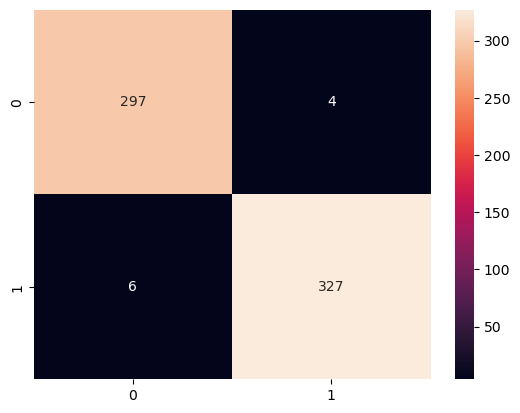

In [19]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

In [20]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9842
Classification error : 0.0158
Precision : 0.9867
Recall or Sensitivity : 0.9802
True Positive Rate : 0.9802
False Positive Rate : 0.0121
Specificity : 0.9879


In [ ]:
!pip install -U scikit-learn
!conda update scikit-learn
--y

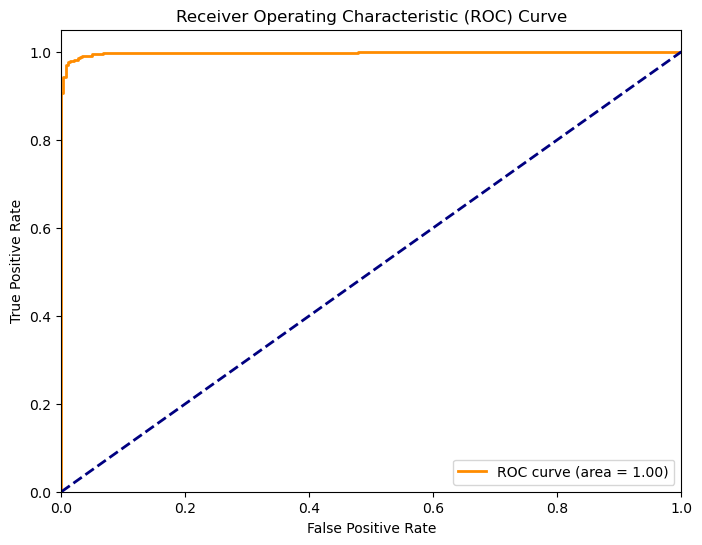

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Assuming you already have your trained SVC model in 'svc', X_test, and y_test
# Convert categorical labels to binary labels
label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_bin, svc.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [25]:
from sklearn.preprocessing import LabelBinarizer

# Convert categorical labels to binary labels
label_binarizer = LabelBinarizer()
y_test_bin = label_binarizer.fit_transform(y_test)
y_pred_bin = label_binarizer.transform(y_pred)

# Compute ROC AUC score
ROC_AUC = roc_auc_score(y_test_bin, y_pred_bin)

print('ROC AUC : {:.4f}'.format(ROC_AUC))


ROC AUC : 0.9843


In [26]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9919


In [27]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.92586751 0.92113565 0.91798107 0.9178515  0.91627172]
Average stratified cross-validation score with linear kernel:0.9198


In [28]:
rbf_svc=SVC(kernel='rbf')

rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

# print cross-validation scores with rbf kernel
print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))

# print average cross-validation score with rbf kernel
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Stratified Cross-validation scores with rbf kernel:

[0.67981073 0.70820189 0.65457413 0.66824645 0.65244866]
Average stratified cross-validation score with rbf kernel:0.6727


In [29]:
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]


grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)
# examine the best model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [30]:
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :', (grid_search.best_estimator_))

# calculate GridSearch CV score on test set

print('\nGridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV best score : 0.9850


Parameters that give the best results : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : SVC(C=10, gamma=0.1)

GridSearch CV score on test set: 0.9842
